<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/13_1_%E1%84%90%E1%85%A6%E1%86%AB%E1%84%89%E1%85%A5%E1%84%91%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A9_2_x%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [7]:
y_train = y_train.reshape(-1, 1)
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [8]:
X_test.shape

(10000, 28, 28)

In [10]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1, 1)
y_test

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [13]:
print("학습셋 이미지 수: {}개".format(X_train.shape[0]))
print("테스트셋 이미지 수: {}개".format(X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train)

OneHotEncoder()

In [15]:
y_train_onehot = enc.transform(y_train).toarray()
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
y_train_onehot = np.array(y_train_onehot, dtype="float32")
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
y_test_onehot = enc.transform(y_test).toarray()
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y_test_onehot = np.array(y_test_onehot, dtype="float32")
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1), activation='relu', padding="SAME"))

In [22]:
model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu', padding="SAME"))

In [23]:
model.add(MaxPooling2D(pool_size=2, strides=1, padding="SAME"))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(512, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
model.fit(X_train, y_train_onehot, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 434s 720ms/step - loss: 4.0282 - acc: 0.9332
Epoch 2/5
600/600 [==============================] - 373s 622ms/step - loss: 0.0528 - acc: 0.9829
Epoch 3/5
600/600 [==============================] - 372s 621ms/step - loss: 0.0318 - acc: 0.9898
Epoch 4/5
600/600 [==============================] - 372s 620ms/step - loss: 0.0267 - acc: 0.9916
Epoch 5/5
600/600 [==============================] - 372s 619ms/step - loss: 0.0193 - acc: 0.9936


In [30]:
predict = model.predict(X_test)
predict

array([[2.3158789e-17, 2.1090250e-18, 5.4557260e-17, ..., 1.0000000e+00,
        3.1717424e-16, 1.2781153e-14],
       [4.6397398e-19, 2.9095330e-16, 1.0000000e+00, ..., 2.5547276e-24,
        9.4262531e-17, 1.8362688e-28],
       [1.3039177e-14, 9.9999964e-01, 3.6206230e-10, ..., 3.0122945e-07,
        1.2688281e-08, 6.7477651e-12],
       ...,
       [1.7924617e-18, 3.3594514e-13, 2.1471623e-18, ..., 1.0095672e-11,
        9.7931496e-11, 8.7662579e-11],
       [1.6441027e-17, 3.0670932e-24, 2.6156147e-20, ..., 1.4040310e-15,
        3.4389643e-07, 3.9625364e-22],
       [2.6118609e-13, 5.6596198e-22, 1.9254423e-14, ..., 2.7927837e-22,
        5.7305988e-13, 1.3739918e-19]], dtype=float32)

In [31]:
predict01 = np.argmax(predict, 1)
predict01

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
target = np.argmax(y_test_onehot, 1)
target

array([7, 2, 1, ..., 4, 5, 6])

In [34]:
predict02 = (predict01 == target)
predict02

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
np.sum(predict02)

9783

In [36]:
acc = np.sum(predict02) / len(predict02)
acc

0.9783

In [37]:
import matplotlib.pyplot as plt

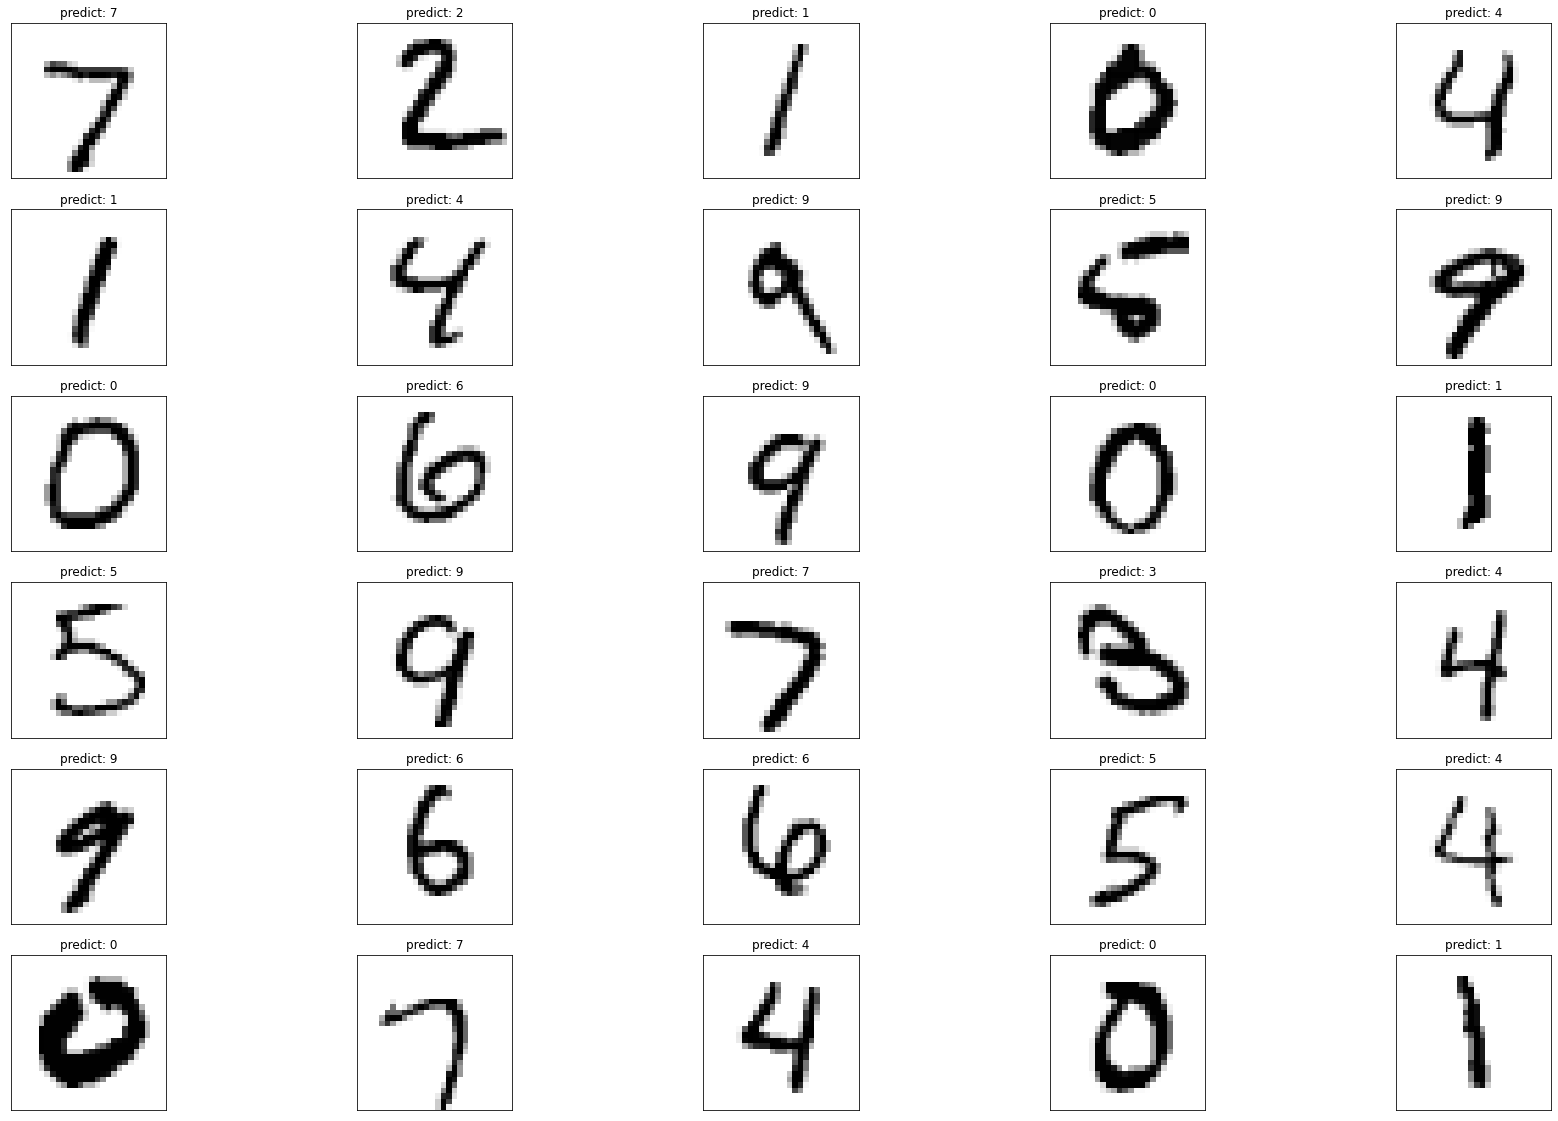

In [38]:
fig = plt.figure(figsize=(30,20))
for i in range(30):
  subplot = fig.add_subplot(6, 5, i+1)

  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('predict: %d' % predict01[i])

  subplot.imshow(X_test[i].reshape((28,28)),
                 cmap=plt.cm.gray_r)
  
plt.show()